In [1]:
import pandas as pd
import numpy as np
import math
import random
import csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from time import time

In [2]:
url = "D:\\TUGAS AKHIR\\Data TA\\Australian fraud dataset\\australian.csv"
colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']

data = pd.read_csv(url, header = None, names = colnames)
data["y"].value_counts()

0    383
1    307
Name: y, dtype: int64

In [3]:
X = data.drop('y', axis = 1)
X = (X-X.mean())/X.std()
y = data['y']

In [4]:
#################### I N P U T ####################
c1 = 0.9
c2 = 0.5
wmax = 0.9
wmin = 0.4
w = wmax

n_iterations = 10
n_particles = 100

In [5]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
    kf = KFold(n_splits = 3)
    svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
   # svclassifier.fit(X_train, y_train)
    scores = cross_val_score(svclassifier, X, y, cv = kf, scoring = 'roc_auc')
    return np.mean(scores)
   # y_train_pred = svclassifier.predict(X_train)
   # y_test_pred = svclassifier.predict(X_test)   
   # return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.3)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.axis([-1,11,-1,11])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

for i in range(n_particles):
    max_velocity = np.array([10,10])
    min_velocity = np.array([-10,-10])
    max_position = np.array([10,10])
    min_position = np.array([0.001, 0.001])

def eval_velocity(new_velocity):
    for j in range(0,2):
        if(new_velocity[j] > max_velocity[j]):
            new_velocity[j] = max_velocity[j]
        elif(new_velocity[j] < min_velocity[j]):
            new_velocity[j] = min_velocity[j]
    return new_velocity

def eval_position(particle_position_vector):
    for j in range(0,2):
        if(particle_position_vector[j] > max_position[j]):
            particle_position_vector[j] = max_position[j]
        elif(particle_position_vector[j] < min_position[j]):
            particle_position_vector[j] = min_position[j]
    return particle_position_vector
        

In [6]:
particle_position_vector = np.array([np.array([random.random()*10, random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([0 for _ in range(n_particles)])
gbest_fitness_value = np.array([0])
gbest_position = np.array([float('inf'), float('inf')])
velocity_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1)))*random.random()*2,(-1) ** (bool(random.getrandbits(1))) * random.random()*2]) for _ in range(n_particles)])
#velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


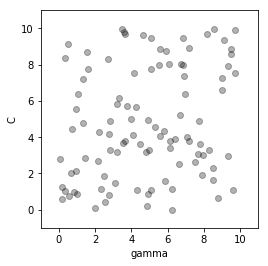

AUC for particle - 1 is 0.81552811786162  At (gamma, c):  [5.79914628 4.3623787 ] .. Time =  0.19201040267944336
AUC for particle - 2 is 0.8106357144684568  At (gamma, c):  [7.16628816 8.93554505] .. Time =  0.13799667358398438
AUC for particle - 3 is 0.9116707652160564  At (gamma, c):  [0.15237573 0.61347629] .. Time =  0.09399747848510742
AUC for particle - 4 is 0.8046812963023876  At (gamma, c):  [8.54572975 9.96980394] .. Time =  0.1320197582244873
AUC for particle - 5 is 0.8166902229093341  At (gamma, c):  [5.09520846 9.48668086] .. Time =  0.1440122127532959
AUC for particle - 6 is 0.8163196298367378  At (gamma, c):  [4.88389331 0.19325558] .. Time =  0.13599562644958496
AUC for particle - 7 is 0.8207027605086089  At (gamma, c):  [3.30276406 6.16208561] .. Time =  0.1759946346282959
AUC for particle - 8 is 0.8201662459933701  At (gamma, c):  [3.5621785  3.67474123] .. Time =  0.16000676155090332
AUC for particle - 9 is 0.8212776509544643  At (gamma, c):  [3.07280562 1.48695773] .

AUC for particle - 73 is 0.8107148989982055  At (gamma, c):  [6.92906179 7.38771581] .. Time =  0.13601279258728027
AUC for particle - 74 is 0.838781434821223  At (gamma, c):  [0.93525499 5.53880305] .. Time =  0.11701607704162598
AUC for particle - 75 is 0.8059976535859565  At (gamma, c):  [7.95467393 3.02322194] .. Time =  0.13949871063232422
AUC for particle - 76 is 0.9136825411444799  At (gamma, c):  [0.05950763 2.78950888] .. Time =  0.10052156448364258
AUC for particle - 77 is 0.8171478335873456  At (gamma, c):  [4.89275411 4.96033842] .. Time =  0.18199563026428223
AUC for particle - 78 is 0.8077487509548297  At (gamma, c):  [7.72161301 4.89238084] .. Time =  0.1329965591430664
AUC for particle - 79 is 0.7958723287611154  At (gamma, c):  [9.62325205 1.08714258] .. Time =  0.1309964656829834
AUC for particle - 80 is 0.8162440943097632  At (gamma, c):  [5.29392848 4.58828815] .. Time =  0.13899445533752441
AUC for particle - 81 is 0.8231243475178083  At (gamma, c):  [2.21055681 4.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 1 is [0.05950763 2.78950888] with AUC: 0.9136825411444799
16.171164751052856


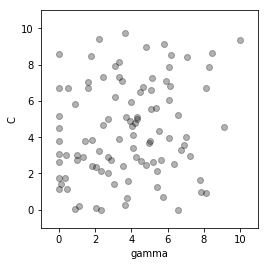

AUC for particle - 1 is 0.8194767891407081  At (gamma, c):  [4.32609892 5.01012837] .. Time =  0.16300678253173828
AUC for particle - 2 is 0.8219657979086946  At (gamma, c):  [2.70370546 5.02081945] .. Time =  0.16300058364868164
AUC for particle - 3 is 0.8383481917626977  At (gamma, c):  [0.98102482 3.00573246] .. Time =  0.13099980354309082
AUC for particle - 4 is 0.8151945908212084  At (gamma, c):  [5.89342731 7.11636025] .. Time =  0.14499711990356445
AUC for particle - 5 is 0.8241902656710853  At (gamma, c):  [1.79202072 8.45804999] .. Time =  0.16900014877319336
AUC for particle - 6 is 0.8158359673841137  At (gamma, c):  [5.43224854 2.12619098] .. Time =  0.15999841690063477
AUC for particle - 7 is 0.8265598426952331  At (gamma, c):  [1.57761422 6.7334836 ] .. Time =  0.1270158290863037
AUC for particle - 8 is 0.8236558095676676  At (gamma, c):  [1.83768169 3.85270982] .. Time =  0.1310126781463623
AUC for particle - 9 is 0.820050556816479  At (gamma, c):  [3.62165436 0.23793385]

In [ ]:
start = time()
while iteration < n_iterations:
    gbest_fitness_value_cadidate = np.array([0])
    gbest_position_cadidate = np.array([float('inf'), float('inf')])
    start1 = time()
    plot(particle_position_vector)
    
    for i in range(n_particles):
        start2 = time()
        fitness_cadidate = fitness_function(particle_position_vector[i])
        stop2 = time()
        print("AUC for particle -", i+1,"is", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i], ".. Time = ", stop2 - start2)
        
        if(pbest_fitness_value[i] < fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value_cadidate < fitness_cadidate):
            gbest_fitness_value_cadidate = fitness_cadidate
            gbest_position_cadidate = particle_position_vector[i]
        
    print("The best position in iteration number", iteration + 1, "is", gbest_position_cadidate, "with AUC:", fitness_function(gbest_position_cadidate))
    
   # if(gbest_fitness_value < gbest_fitness_value_cadidate):
    #    gbest_fitness_value = gbest_fitness_value_cadidate
     #   gbest_position = gbest_position_cadidate
    #print("The best position so far is ", gbest_position, "in iteration number", iteration + 1, "with AUC:", fitness_function(gbest_position))
    
    for i in range(n_particles):
        new_velocity = w*velocity_vector[i] + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position_cadidate-particle_position_vector[i])
        new_velocity = eval_velocity(new_velocity)
            
        particle_position_vector[i] = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = eval_position(particle_position_vector[i])
    w = (wmax - wmin)*(n_iterations - iteration)/n_iterations + wmin
    iteration = iteration + 1
    stop1 = time()
    sec = stop1-start1
    print(sec)
stop = time()
print(stop - start)
